In [ ]:
# import the libraries
!pip install pandas_datareader
import numpy as np
import pandas as pd
import statsmodels
from statsmodels.tsa.stattools import coint   # use this library to find this out the p_value
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import datetime

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def downloadStockData(tickers,start,end):
    """
        This function downloads the Close price of the stock and creates a dataframe from it
        Params:
            tickers : a list of ticker of various stocks
            start   : it is the start date of the data to be downloaded. It is a datetime in datetime format.
            end     : it is the end date of the data to be downloaded. It is a datetime in datetime format.

        Return:
            A dataframe with all the close for of each stock on each open market day
    """
    ticker_data = pdr.get_data_yahoo(tickers, start, end)['Adj Close']
    return ticker_data


In [ ]:
!pip install yfinance
import yfinance as yf
tickers = ['ADANIPORTS.NS',
 'TECHM.NS',
 'BRITANNIA.NS',
 'TCS.NS',
 'SUNPHARMA.NS',
 'INFY.NS',
 'HINDALCO.NS',
 'DRREDDY.NS',
 'HCLTECH.NS',
 'HINDUNILVR.NS',
 'TATASTEEL.NS',
 'NTPC.NS',
 'CIPLA.NS',
 'ITC.NS',
 'BPCL.NS',
 'WIPRO.NS',
 'JSWSTEEL.NS',
 'GAIL.NS',
 'DIVISLAB.NS',
 'ULTRACEMCO.NS',
 'NESTLEIND.NS',
 'ASIANPAINT.NS',
 'EICHERMOT.NS',
 'IOC.NS',
 'GRASIM.NS',
 'BAJAJ-AUTO.NS',
 'HDFC.NS',
 'M&M.NS',
 'UPL.NS',
 'SHREECEM.NS',
 'MARUTI.NS',
 'TITAN.NS',
 'BAJAJFINSV.NS',
 'KOTAKBANK.NS',
 'COALINDIA.NS',
 'BHARTIARTL.NS',
 'HEROMOTOCO.NS',
 'LT.NS',
 'ONGC.NS',
 'SBIN.NS',
 'RELIANCE.NS',
 'BAJFINANCE.NS',
 'AXISBANK.NS',
 'HDFCBANK.NS',
 'TATAMOTORS.NS',
 'ICICIBANK.NS',
 'POWERGRID.NS',
 'INDUSINDBK.NS']
start = datetime.datetime(2013,1,1)
end = datetime.datetime(2021,1,1)
#data = downloadStockData(tickers,start,end)

yf.pdr_override()
data = pd.DataFrame()
for i in range(len(tickers)):
    try:
        o = pdr.get_data_yahoo(tickers[i],start, end)
        data[str(tickers[i])] = o["Close"]
    except:
        print('error')
        print(i)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
data.dropna(inplace = True)
data

,ADANIPORTS.NS,TECHM.NS,BRITANNIA.NS,TCS.NS,SUNPHARMA.NS,INFY.NS,HINDALCO.NS,DRREDDY.NS,HCLTECH.NS,HINDUNILVR.NS,TATASTEEL.NS,NTPC.NS,CIPLA.NS,ITC.NS,BPCL.NS,WIPRO.NS,JSWSTEEL.NS,GAIL.NS,DIVISLAB.NS,ULTRACEMCO.NS,NESTLEIND.NS,ASIANPAINT.NS,EICHERMOT.NS,IOC.NS,GRASIM.NS,BAJAJ-AUTO.NS,HDFC.NS,M&M.NS,UPL.NS,SHREECEM.NS,MARUTI.NS,TITAN.NS,BAJAJFINSV.NS,KOTAKBANK.NS,COALINDIA.NS,BHARTIARTL.NS,HEROMOTOCO.NS,LT.NS,ONGC.NS,SBIN.NS,RELIANCE.NS,BAJFINANCE.NS,AXISBANK.NS,HDFCBANK.NS,TATAMOTORS.NS,ICICIBANK.NS,POWERGRID.NS,INDUSINDBK.NS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,137.800003,233.412506,250.675003,632.075012,369.750000,288.606262,134.149994,1835.750000,155.537506,530.599976,417.489197,129.583328,417.450012,191.500000,118.766663,148.837540,83.110001,100.518799,549.125000,2022.800049,4951.600098,442.304993,292.304993,66.662498,495.648010,2131.899902,832.950012,470.899994,88.266663,4609.450195,1514.400024,286.899994,911.650024,324.975006,359.950012,295.745239,1897.349976,722.177795,178.433334,242.645004,416.402924,132.635406,272.540009,342.250000,313.388580,210.627274,113.849998,423.250000
2013-01-02,138.449997,234.925003,252.149994,631.650024,370.450012,288.649994,135.000000,1837.699951,156.312500,530.500000,417.441559,131.250000,420.450012,190.266663,122.150002,147.656281,82.730003,102.585991,552.900024,2035.250000,4974.299805,437.195007,285.535004,68.000000,494.563599,2202.250000,846.599976,469.299988,87.800003,4588.299805,1557.400024,287.799988,910.299988,328.450012,358.700012,294.781158,1905.349976,733.133362,183.066666,245.054993,419.993866,131.178040,277.369995,343.674988,314.625336,213.454544,113.099998,433.000000
2013-01-03,138.300003,235.337494,253.850006,640.299988,366.924988,292.237488,134.399994,1882.300049,156.487503,532.349976,421.395416,131.291672,417.850006,189.033340,122.083336,149.175034,83.110001,102.192238,546.849976,2024.849976,4899.200195,439.670013,286.024994,67.887497,492.154633,2214.899902,845.500000,468.200012,91.199997,4610.149902,1543.300049,282.750000,914.900024,327.450012,360.450012,301.162506,1887.949951,727.488892,186.533340,247.160004,426.333771,134.709747,277.989990,341.674988,314.724274,213.100006,114.150002,434.299988
2013-01-04,137.500000,235.625000,255.100006,649.599976,367.575012,293.693756,132.550003,1889.349976,158.512497,534.700012,413.011322,132.416672,416.149994,188.266663,124.666664,151.368790,82.754997,104.385986,555.150024,2041.900024,4875.850098,440.200012,282.269989,70.287498,494.106598,2205.600098,837.700012,470.625000,90.599998,4596.399902,1545.449951,285.450012,930.599976,325.100006,363.799988,300.244324,1887.949951,723.555542,189.866669,248.669998,426.878632,134.772888,275.790009,339.674988,312.052917,214.981812,114.949997,430.750000
2013-01-07,140.050003,231.762497,250.899994,647.424988,372.075012,296.850006,134.399994,1887.599976,156.975006,525.400024,420.061584,131.333328,424.350006,186.033340,128.500000,151.856293,85.480003,103.035988,547.349976,2040.699951,4874.149902,439.434998,284.345001,70.312500,493.355225,2196.899902,822.950012,477.075012,91.500000,4532.750000,1584.599976,281.649994,917.299988,324.225006,360.200012,300.060699,1897.300049,705.844421,192.000000,246.759995,424.278259,134.573715,274.570007,334.100006,309.925751,214.936356,114.400002,431.350006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,478.549988,947.250000,3618.250000,2909.350098,590.450012,1236.050049,236.949997,5201.799805,919.349976,2402.250000,622.299988,99.949997,833.200012,208.600006,377.549988,382.200012,366.250000,120.150002,3749.600098,5044.750000,18566.349609,2648.250000,2436.750000,90.250000,897.150024,3374.750000,2455.149902,710.900024,449.399994,23826.750000,7446.049805,1495.900024,8992.549805,1960.599976,136.250000,517.299988,3073.100098,1262.199951,93.150002,266.850006,1994.150024,5184.899902,610.200012,1

In [ ]:
def findCointegrationValue(data,p_value_threshold=0.05):
    """
        This function find out the pairs of stock with p value less than a constant
        Params:
            data               : the dataframe containning all the close for of each stock on each open market day
            p_value_threshold  : the threshold value for the p value of pairs of stocks. We consider a 2 stocks to be cointegrted only if the p value is less than this value

        Returns:
            p values of all the pairs , the list of all the pairs with p value less than the threshold 
    """
    n = data.shape[1]
    score_ = np.zeros((n, n))
    pvalue_ = np.zeros((n, n))
    keys = data.keys()
    pairs = []

    for i in range(n):
        for j in range(i+1, n):
            s1 = data[keys[i]]
            s2 = data[keys[j]]
            result = coint(s1, s2)
            score_[i, j] = result[0]
            pvalue_[i, j] = result[1]
            
            if result[1] < p_value_threshold:
                pairs.append((keys[i], keys[j], result[1]))
                
    
    return score_, pvalue_, pairs
  
scores_final, pvalues_final, pairs_final =  findCointegrationValue(data=data)

def getBestKCointergratedStocks(data,k=10,p_value_threshold=0.05):
    """
        This functions find out the k pairs with the least p value and all of them should be less than the threshold  
        Params:
            data               : The list of tuples containing X, Y, and corresponding pvalue (< p_value_threshold)
            k                  : the number of pairs to be found out
            p_value_threshold  : the threshold value for the p value of pairs of stocks. We consider a 2 stocks to be cointegrted only if the p value is less than this value

        Returns:
            the p value for all the pairs of stocks , the list k pairs with the least p value and their p values . If k such pairs doesn't exists return how many of them occur 
    """
  
    df = pd.DataFrame(data, columns=['X', 'Y', 'pvalue'])
  
    return df.sort_values(by='pvalue').head(k)

df = getBestKCointergratedStocks(pairs_final, p_value_threshold=0.05)    

In [ ]:
df

,X,Y,pvalue
20,HDFC.NS,BAJAJFINSV.NS,0.000003
14,ULTRACEMCO.NS,BAJAJ-AUTO.NS,0.000098
32,BAJFINANCE.NS,ICICIBANK.NS,0.001164
1,ADANIPORTS.NS,BAJAJ-AUTO.NS,0.001506
21,HDFC.NS,HDFCBANK.NS,0.001680
12,BPCL.NS,BAJAJ-AUTO.NS,0.002783
9,TATASTEEL.NS,GRASIM.NS,0.003919
31,COALINDIA.NS,RELIANCE.NS,0.008096
7,HCLTECH.NS,ASIANPAINT.NS,0.008345
19,BAJAJ-AUTO.NS,POWERGRID.NS,0.009093


In [ ]:
    def check_for_stationarity(X, cutoff=0.01):
        # H_0 in adfuller is unit root exists (non-stationary)\n",
        # We must observe significant p-value to convince ourselves that the series is stationary\n",
        pvalue = adfuller(X)[1]
        if pvalue < cutoff:
            print ('p-value = ' + str(pvalue) + ' The series ' + X.name +' is likely stationary')
            return True
        else:
            print ('p-value = ' + str(pvalue) + ' The series ' + X.name +' is likely non-stationary')
            return False


In [ ]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

X1 = data["HDFC.NS"]
X2 = data["BAJAJFINSV.NS"]
X1 = sm.add_constant(X1)
results = sm.OLS(X2, X1).fit()

results.params


const     -3956.372776
HDFC.NS       5.377320
dtype: float64

3.8898606058188786e-07

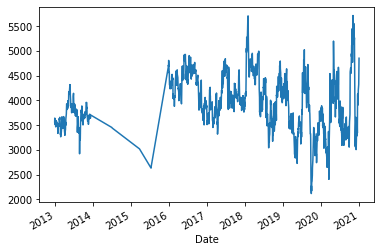

In [ ]:
(5.377*data["HDFC.NS"]-data["BAJAJFINSV.NS"]).plot()
adfuller(5.377*data["HDFC.NS"]-data["BAJAJFINSV.NS"])[1]


In [ ]:
tickers = ['HDFC.NS','BAJAJFINSV.NS']
start = datetime.datetime(2020,11,20)
end = datetime.datetime(2021,6,30)
#data = downloadStockData(tickers,start,end)

yf.pdr_override()
datanew = pd.DataFrame()
for i in range(len(tickers)):
    try:
        o = pdr.get_data_yahoo(tickers[i],start, end)
        datanew[str(tickers[i])] = o["Close"]
    except:
        print('error')
        print(i)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
datanew

,HDFC.NS,BAJAJFINSV.NS
Date,,
2020-11-20,2334.800049,8542.599609
2020-11-23,2250.800049,8774.349609
2020-11-24,2217.699951,8859.700195
2020-11-25,2191.350098,8717.750000
2020-11-26,2238.399902,8806.700195
...,...,...
2021-06-23,2497.199951,12282.250000
2021-06-24,2487.399902,12333.250000
2021-06-25,2509.199951,12486.599609


               0      HDFC.NS  BAJAJFINSV.NS    zscore
0    4869.666450  2578.500000    8898.750000  1.997413
1    5339.234357  2651.850098    8820.849609  2.418656
2    5304.318257  2638.850098    8786.349609  2.097884
3    5222.811116  2661.350098    8988.000000  1.809433
4    5018.653141  2657.500000    9171.599609  1.427387
..           ...          ...            ...       ...
115  1052.048579  2497.199951   12282.250000 -2.523415
116   948.719259  2487.399902   12333.250000 -2.457930
117   911.775370  2509.199951   12486.599609 -2.246149
118   944.383864  2494.949951   12377.900391 -1.937952
119  1055.756989  2501.199951   12299.900391 -1.517379

[120 rows x 4 columns]
0.013661363130141107
Hedged profit 469.5679070800781
Hedged profit -204.15797583007813
Hedged profit 685.8296292724609
Hedged profit -243.93917780761717
Hedged profit 116.51861843261719
Hedged profit -162.67687072753904
Hedged profit -72.25512499999996
Hedged profit -86.57517697753912
Hedged profit -230.17434614257

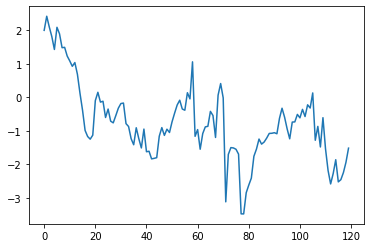

In [ ]:
import numpy as np
import pandas as pd
import statsmodels
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import coint   # use this library to find this out the p_value
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import datetime

def trade8(S1, S2,window, MAX_SHORTING_AMOUNT, MAX_TRANSACTION_AT_A_TIME,error_bound1,error_bound2):
    
    spread = []
    beta = 5.3397
    spread.append(beta*S1 - S2)
    df = pd.DataFrame(spread)
    df = df.T  
    df["HDFC.NS"] = datanew["HDFC.NS"]  
    df["BAJAJFINSV.NS"] = datanew["BAJAJFINSV.NS"]
    df["Roll mean"] = df[0].rolling(window = 30).mean()
    df["Roll std"] = df[0].rolling(window = 30).std()
    df["zscore"] = (df[0]-df["Roll mean"])/df["Roll std"]
    df = df.drop(["Roll mean", "Roll std"], axis = 1)
    df = df.dropna()
    df = df.reset_index(drop=True)
    print(df)
    df["zscore"].plot()
    print(adfuller(df["zscore"].dropna())[1]) 
    df["Buy"] = 0
    df["Sell"] = 0
    for i in range(len(df)) :
      if i==0 :
        df.loc[i,"Buy"] = 1 if df.loc[i,"zscore"]>1.5 and df.loc[i,"zscore"]<2 else 0
      else :
        if df.loc[i,"zscore"]>1.5 and df.loc[i,"zscore"]<2:
          df.loc[i,"Buy"] = 1
        if df.loc[i-1, "Buy"] == 1 and df.loc[i,"zscore"]>1 and df.loc[i,"zscore"]<2:
          df.loc[i,"Buy"] = 1  
    for i in range(len(df)) :
      if i==0 :
        df.loc[i,"Sell"] = 1 if df.loc[i,"zscore"]<-1.5 and df.loc[i,"zscore"]>-2 else 0
      else :
        if df.loc[i,"zscore"]<-1.5 and df.loc[i,"zscore"]>-2:
          df.loc[i,"Sell"] = 1
        if df.loc[i-1, "Sell"] == 1 and df.loc[i,"zscore"]<-1 and df.loc[i,"zscore"]>-2:
          df.loc[i,"Sell"] = 1 
    money = 0 
    for i in range(len(df)-1) :
      if df.loc[i,"Buy"] == 1 : 
        money += beta*(df.loc[i+1,"HDFC.NS"]-df.loc[i,"HDFC.NS"])
        #print("Long profit HDFC %s" %(beta*(df.loc[i+1,"HDFC.NS"]-df.loc[i,"HDFC.NS"]))  )   
        money -= (df.loc[i+1,"BAJAJFINSV.NS"] - df.loc[i,"BAJAJFINSV.NS"])
        #print("Short profit BAJAJFINSV %s" %(df.loc[i,"BAJAJFINSV.NS"] - df.loc[i+1,"BAJAJFINSV.NS"]))
        print("Hedged profit %s" %(df.loc[i,"BAJAJFINSV.NS"] - df.loc[i+1,"BAJAJFINSV.NS"] + beta*(df.loc[i+1,"HDFC.NS"]-df.loc[i,"HDFC.NS"])))

      elif df.loc[i,"Sell"] == 1:
        money += (df.loc[i+1,"BAJAJFINSV.NS"] - df.loc[i,"BAJAJFINSV.NS"])
        #print("Long profit BAJAJFINSV %s" %(df.loc[i+1,"BAJAJFINSV.NS"] - df.loc[i,"BAJAJFINSV.NS"]))
        money -= beta*(df.loc[i+1,"HDFC.NS"]-df.loc[i,"HDFC.NS"])
        #print("Short profit HDFC %s" %(beta*(df.loc[i,"HDFC.NS"]-df.loc[i+1,"HDFC.NS"])) )   
        print("Hedged profit %s" %(beta*(df.loc[i,"HDFC.NS"]-df.loc[i+1,"HDFC.NS"]) + df.loc[i+1,"BAJAJFINSV.NS"] - df.loc[i,"BAJAJFINSV.NS"]))
     
    print(df)

##print(df.head(60))
    print(money)

trade8( datanew['HDFC.NS'],datanew['BAJAJFINSV.NS'], 60,10000,5,0.5,0.25)

# Reaons why those 2 stocks are similar. (Explain for any 2 stocks in this text cell)


We know that the **Pairs trading** strategies speculate on future convergence of spread between similar
securities. Similarity concerns industry, sector, market capitalization, and other common exposures
that might imply a comovement between stocks.

Take example of Adobe and Microsoft, These companies share the same sector, i.e., **IT**, and even their Industry is same, i.e., **Software—Infrastructure**. They deal with same type of technologies such as 3d modelling, Cloud systems, Application Software.

Hence it can be understood that companies sharing common industry and type of sector, are leveraged by the macroecomic factors like GDP growth, etc has a similar kind of effect on their trade. As we know pairs trading is a market neutral trading strategy enabling traders to profit from virtually any market conditions: uptrend, downtrend, or sideways movement and both these stocks fulfill this in as a pair. So, that's why the particular stocks are similar.

